# Improving Data Quality

**Learning Objectives**


1. Resolve missing values
2. Convert the Date feature column to a datetime format
3. Rename a feature column, remove a value from a feature column
4. Create one-hot encoding features
5. Understand temporal feature conversions 


## Introduction 

Recall that machine learning models can only consume numeric data, and that numeric data should be "1"s or "0"s.  Data is said to be "messy" or "untidy" if it is missing attribute values, contains noise or outliers, has duplicates, wrong data, upper/lower case column names, and is essentially not ready for ingestion by a machine learning algorithm.  

This notebook presents and solves some of the most common issues of "untidy" data.  Note that different problems will require different methods, and they are beyond the scope of this notebook.

Each learning objective will correspond to a _#TODO_ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/solutions/improve_data_quality.ipynb).

In [1]:
#!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

Start by importing the necessary libraries for this lab.

### Import Libraries

In [1]:
# Importing necessary tensorflow library and printing the TF version.
import tensorflow as tf

print("TensorFlow version: ",tf.version.VERSION)


c:\Users\esnei\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.10.0


In [2]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Dataset into a Pandas DataFrame

Next, let's read in the dataset just copied from the cloud storage bucket and create a Pandas DataFrame.  We also add a Pandas .head() function to show you the top 5 rows of data in the DataFrame. Head() and Tail() are "best-practice" functions used to investigate datasets.  

In [4]:
df_transport = pd.read_csv(r'F:\Data science\Machine Learning Engenieer Google\data\untidy_vehicle_data_toy.csv')
df_transport.head() # Output the first five rows.

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


### DataFrame Column Data Types

DataFrames may have heterogenous or "mixed" data types, that is, some columns are numbers, some are strings, and some are dates etc. Because CSV files do not contain information on what data types are contained in each column, Pandas infers the data types when loading the data, e.g. if a column contains only numbers, Pandas will set that column’s data type to numeric: integer or float.

Run the next cell to see information on the DataFrame.

In [5]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


From what the .info() function shows us, we have six string objects and one float object.  Let's print out the first and last five rows of each column. We can definitely see more of the "string" object values now!

In [6]:
print(df_transport)

          Date  Zip Code Model Year                      Fuel       Make  \
0    10/1/2018   90000.0       2006                  Gasoline  OTHER/UNK   
1    10/1/2018       NaN       2014                  Gasoline        NaN   
2          NaN   90000.0        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018   90000.0       2017                  Gasoline  OTHER/UNK   
4    10/1/2018   90000.0      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...       ...        ...                       ...        ...   
494  12/3/2018   90002.0       2010                  Gasoline     Type_I   
495  12/4/2018   90002.0       2010                  Gasoline     Type_B   
496  12/5/2018   90002.0       2010                  Gasoline     Type_C   
497  12/6/2018   90002.0       2010                  Gasoline     Type_J   
498  12/7/2018   90002.0       2010                  Gasoline     Type_J   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2     

### Summary Statistics 

At this point, we have only one column which contains a numerical value (e.g. Vehicles).  For features which contain numerical values, we are often interested in various statistical measures relating to those values.  We can use .describe() to see some summary statistics for the numeric fields in our dataframe. Note, that because we only have one numeric feature, we see only one summary stastic - for now.  

In [7]:
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


Let's investigate a bit more of our data by using the .groupby() function.

In [8]:
df_transport.groupby('Fuel').first() # Get the first entry for each month. 

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


#### Checking for Missing Values

Missing values adversely impact data quality, as they can lead the machine learning model to make inaccurate inferences about the data. Missing values can be the result of numerous factors, e.g. "bits" lost during streaming transmission, data entry, or perhaps a user forgot to fill in a field.  Note that Pandas recognizes both empty cells and “NaN” types as missing values. 

Let's show the null values for all features in the DataFrame.

In [10]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

To see a sampling of which values are missing, enter the feature column name.  You'll notice that "False" and "True" correpond to the presence or abscence of a value by index number.

In [11]:
print (df_transport['Date'])
print (df_transport['Date'].isnull())

0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
494    12/3/2018
495    12/4/2018
496    12/5/2018
497    12/6/2018
498    12/7/2018
Name: Date, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Date, Length: 499, dtype: bool


In [12]:
print (df_transport['Make'])
print (df_transport['Make'].isnull())

0      OTHER/UNK
1            NaN
2      OTHER/UNK
3      OTHER/UNK
4      OTHER/UNK
         ...    
494       Type_I
495       Type_B
496       Type_C
497       Type_J
498       Type_J
Name: Make, Length: 499, dtype: object
0      False
1       True
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Make, Length: 499, dtype: bool


In [13]:
print (df_transport['Model Year'])
print (df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
494     2010
495     2010
496     2010
497     2010
498     2010
Name: Model Year, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Model Year, Length: 499, dtype: bool


### What can we deduce about the data at this point?

First, let's summarize our data by row, column, features, unique, and missing values,

In [14]:
print ("Rows     : " ,df_transport.shape[0])
print ("Columns  : " ,df_transport.shape[1])
print ("\nFeatures : \n" ,df_transport.columns.tolist())
print ("\nUnique values :  \n",df_transport.nunique())
print ("\nMissing values :  ", df_transport.isnull().sum().values.sum())


Rows     :  499
Columns  :  7

Features : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values :  
 Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

Missing values :   17


Let's see the data again -- this time the last five rows in the dataset.

In [15]:
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
494,12/3/2018,90002.0,2010,Gasoline,Type_I,Yes,11.0
495,12/4/2018,90002.0,2010,Gasoline,Type_B,Yes,58.0
496,12/5/2018,90002.0,2010,Gasoline,Type_C,Yes,45.0
497,12/6/2018,90002.0,2010,Gasoline,Type_J,Yes,82.0
498,12/7/2018,90002.0,2010,Gasoline,Type_J,Yes,12.0


### What Are Our Data Quality Issues?

1. **Data Quality Issue #1**:  
> **Missing Values**:
Each feature column has multiple missing values.  In fact, we have a total of 18 missing values.
2. **Data Quality Issue #2**: 
> **Date DataType**:  Date is shown as an "object" datatype and should be a datetime.  In addition, Date is in one column.  Our business requirement is to see the Date parsed out to year, month, and day.  
3. **Data Quality Issue #3**: 
> **Model Year**: We are only interested in years greater than 2006, not "<2006".
4. **Data Quality Issue #4**:  
> **Categorical Columns**:  The feature column "Light_Duty" is categorical and has a "Yes/No" choice.  We cannot feed values like this into a machine learning model.  In addition, we need to "one-hot encode the remaining "string"/"object" columns.
5. **Data Quality Issue #5**:  
> **Temporal Features**:  How do we handle year, month, and day?


#### Data Quality Issue #1:  
##### Resolving Missing Values

Most algorithms do not accept missing values.  Yet, when we see missing values in our dataset, there is always a tendency to just "drop all the rows" with missing values.  Although Pandas will fill in the blank space with “NaN", we should "handle" them in some way.

While all the methods to handle missing values is beyond the scope of this lab, there are a few methods you should consider.  For numeric columns, use the "mean" values to fill in the missing numeric values.  For categorical columns, use the "mode" (or most frequent values) to fill in missing categorical values. 

In this lab, we use the .apply and Lambda functions to fill every column with its own most frequent value.  You'll learn more about Lambda functions later in the lab.

Let's check again for missing values by showing how many rows contain NaN values for each feature column.

**Lab Task #1a:** Check for missing values by showing how many rows contain NaN values for each feature column.

In [11]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

**Lab Task #1b:** Apply the lambda function.

In [12]:
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

**Lab Task #1c:** Check again for missing values.

In [13]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

#### Data Quality Issue #2:  
##### Convert the Date Feature Column to a Datetime Format

The date column is indeed shown as a string object.

**Lab Task #2a:** Convert the datetime datatype with the to_datetime() function in Pandas.

In [19]:
df_transport['Date'] = pd.to_datetime(df_transport['Date'], format = '%m/%d/%Y')

**Lab Task #2b:** Show the converted Date.

In [21]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


Let's parse Date into three columns, e.g. year, month, and day.

In [22]:
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day
#df['hour'] = df['date'].dt.hour - you could use this if your date format included hour.
#df['minute'] = df['date'].dt.minute - you could use this if your date format included minute.
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
 7   year        499 non-null    int64         
 8   month       499 non-null    int64         
 9   day         499 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 39.1+ KB


Next, let's confirm the Date parsing.  This will also give us a another visualization of the data.

In [23]:
# Here, we are creating a new dataframe called "grouped_data" and grouping by on the column "Make"
grouped_data = df_transport.groupby(['Make'])

# Get the first entry for each month.
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,2019,1
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,2018,1
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2018,2


Now that we have Dates as a integers, let's do some additional plotting.

<Figure size 1000x600 with 0 Axes>

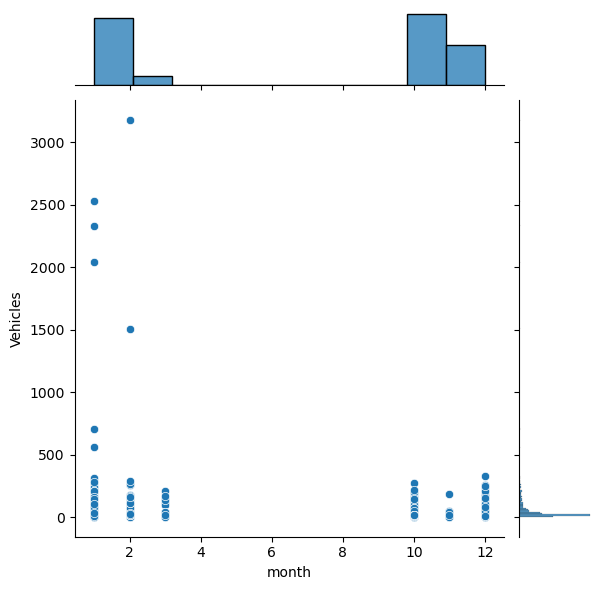

In [25]:
plt.figure(figsize=(10,6))
sns.jointplot(x='month',y='Vehicles',data=df_transport)

#### Data Quality Issue #3:  
##### Rename a Feature Column and Remove a Value.  

Our feature columns have different "capitalizations" in their names, e.g. both upper and lower "case".  In addition, there are "spaces" in some of the column names.  In addition, we are only interested in years greater than 2006, not "<2006".  

**Lab Task #3a:** Remove all the spaces for feature columns by renaming them.

In [33]:
df_transport.columns=['date',
                    'zipcode',
                    'modelyear',
                    'fuel',
                    'make',
                    'lightduty',
                    'vehicles',
                    'year',
                    'month',
                    'day'
                    ]
df_transport.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


 **Note:** Next we create a copy of the dataframe to avoid the "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame" warning.  Run the cell to remove the value '<2006' from the modelyear feature column. 

**Lab Task #3b:** Create a copy of the dataframe to avoid copy warning issues.

In [37]:
df = df_transport.loc[df_transport.modelyear !='<2006'].copy()

Next, confirm that the modelyear value '<2006' has been removed by doing a value count.

In [38]:
df['modelyear'].value_counts(0)

2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: modelyear, dtype: int64

#### Data Quality Issue #4:  
##### Handling Categorical Columns

The feature column "lightduty" is categorical and has a "Yes/No" choice.  We cannot feed values like this into a machine learning model.  We need to convert the binary answers from strings of yes/no to integers of 1/0.  There are various methods to achieve this.  We will use the "apply" method with a lambda expression.  Pandas. apply() takes a function and applies it to all values of a Pandas series.

##### What is a Lambda Function?

Typically, Python requires that you define a function using the def keyword. However, lambda functions are anonymous -- which means there is no need to name them. The most common use case for lambda functions is in code that requires a simple one-line function (e.g. lambdas only have a single expression).  

As you progress through the Course Specialization, you will see many examples where lambda functions are being used.  Now is a good time to become familiar with them.

First, lets count the number of "Yes" and"No's" in the 'lightduty' feature column.

In [40]:
df['lightduty'].value_counts(0)

Yes    374
No      42
Name: lightduty, dtype: int64

Let's convert the Yes to 1 and No to 0. Pandas. apply()  . apply takes a function and applies it to all values of a Pandas series (e.g. lightduty). 

In [41]:
df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if x=='No' else 1)
df['lightduty'].value_counts(0)

1    374
0     42
Name: lightduty, dtype: int64

In [42]:
# Confirm that "lightduty" has been converted.

df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


#### One-Hot Encoding Categorical Feature Columns

Machine learning algorithms expect input vectors and not categorical features. Specifically, they cannot handle text or string values.  Thus, it is often useful to transform categorical features into vectors.

One transformation method is to create dummy variables for our categorical features.  Dummy variables are a set of binary (0 or 1) variables that each represent a single class from a categorical feature.  We simply  encode the categorical variable as a one-hot vector, i.e. a vector where only one element is non-zero, or hot.  With one-hot encoding, a categorical feature becomes an array whose size is the number of possible choices for that feature.

Panda provides a function called "get_dummies" to convert a categorical variable into dummy/indicator variables.

In [43]:
# Making dummy variables for categorical data with more inputs.  

data_dummy = pd.get_dummies(df[['zipcode','modelyear', 'fuel', 'make']], drop_first=True)
data_dummy.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Lab Task #4a:** Merge (concatenate) original data frame with 'dummy' dataframe.

In [45]:
df = pd.concat([df,data_dummy], axis = 1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


**Lab Task #4b:** Drop attributes for which we made dummy variables.

In [46]:
df = df.drop(['zipcode','modelyear', 'fuel', 'make'], axis= 1)

In [47]:
# Confirm that 'zipcode','modelyear', 'fuel', and 'make' have been dropped.

df.head()

,date,lightduty,vehicles,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,0,16.0,2018,10,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,0,23.0,2018,10,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Quality Issue #5:  
##### Temporal Feature Columns

Our dataset now contains year, month, and day feature columns.  Let's convert the month and day feature columns to meaningful representations as a way to get us thinking about changing temporal features -- as they are sometimes overlooked.  

Note that the Feature Engineering course in this Specialization will provide more depth on methods to handle year, month, day, and hour feature columns.

First, let's print the unique values for "month" and "day" in our dataset.

In [48]:
print ('Unique values of month:',df.month.unique())
print ('Unique values of day:',df.day.unique())
print ('Unique values of year:',df.year.unique())

Unique values of month: [10 11 12  1  2  3]
Unique values of day: [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique values of year: [2018 2019]


Next, we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions.   Don't worry, this is the last time we will use this code, as you can develop an input pipeline to address these temporal feature columns in TensorFlow and Keras - and it is much easier!  But, sometimes you need to appreciate what you're not going to encounter as you move through the course!

Run the cell to view the output.

**Lab Task #5:** Drop month, and day

In [51]:
df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

df = df.drop(['month', 'day', 'year'], axis=1)

In [52]:
# scroll left to see the converted month and day coluumns.
df.tail(4)

,date,lightduty,vehicles,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,...,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,day_sin,day_cos,month_sin,month_cos
495,2018-12-04,1,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.724793,0.688967,-0.5,0.866025
496,2018-12-05,1,45.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.848644,0.528964,-0.5,0.866025
497,2018-12-06,1,82.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.937752,0.347305,-0.5,0.866025
498,2018-12-07,1,12.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.988468,0.151428,-0.5,0.866025


### Conclusion

This notebook introduced a few concepts to improve data quality.  We resolved missing values, converted the Date feature column to a datetime format, renamed feature columns, removed a value from a feature column, created one-hot encoding features, and converted temporal features to meaningful representations.  By the end of our lab, we gained an understanding as to why data should be "cleaned" and "pre-processed" before input into a machine learning model.

Copyright 2021 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.